In [1]:
import mlrose_hiive as mlrose
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
import time

In [2]:
import sklearn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from mlrose_hiive.fitness._discrete_peaks_base import _DiscretePeaksBase

#### Notes for mlrose-hiive library:
- rhc.py, sa.py, ga.py -- core implementations for those algos
- **Runners** -- utility classes used to streamline those **algos** executions. Manage configs, run experiments, collect results and have interface for easy execution
- **Generators** -- used to generate initial states or problem instances for the **optimization process**. Help create the initial config needed to start the optimization process. 

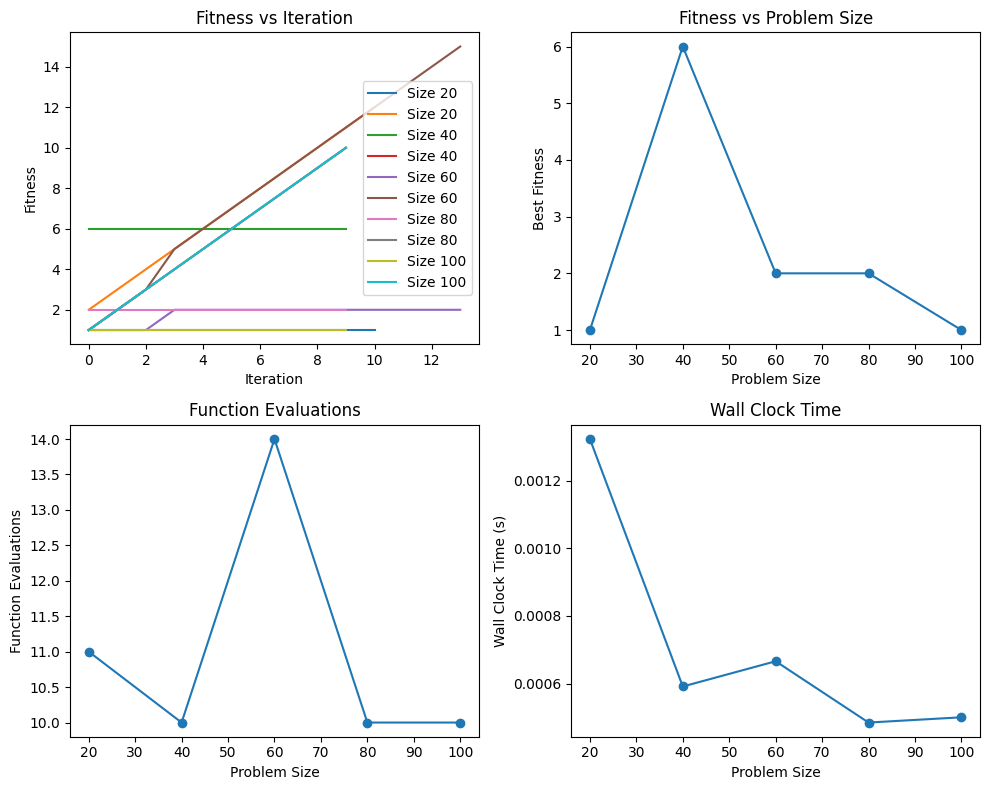

In [5]:
# Define a function to run the experiment
def run_rhc_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)

    # Run RHC
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True)
    end_time = time.time()

    # Gather results
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_experiment(size)
    results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')

plt.tight_layout()
plt.show()


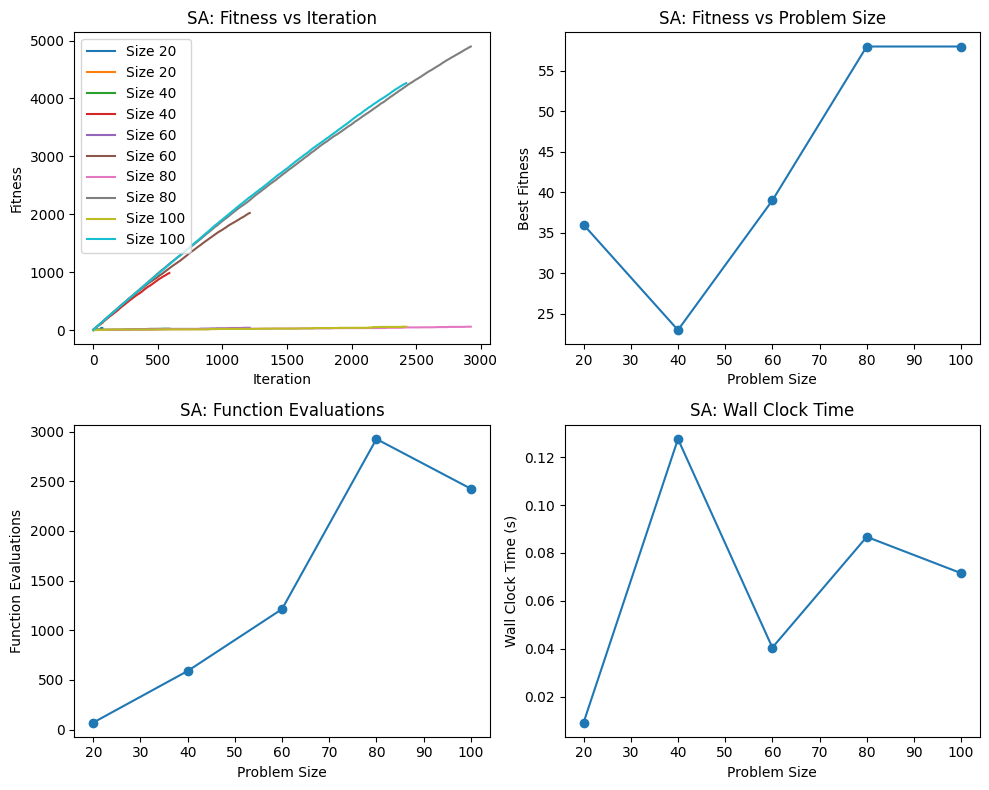

In [6]:
# Function to run SA experiment
def run_sa_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    
    schedule = mlrose.ExpDecay()
    
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True)
    end_time = time.time()
    
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
sa_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results for SA
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('SA: Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('SA: Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('SA: Wall Clock Time')

plt.tight_layout()
plt.show()


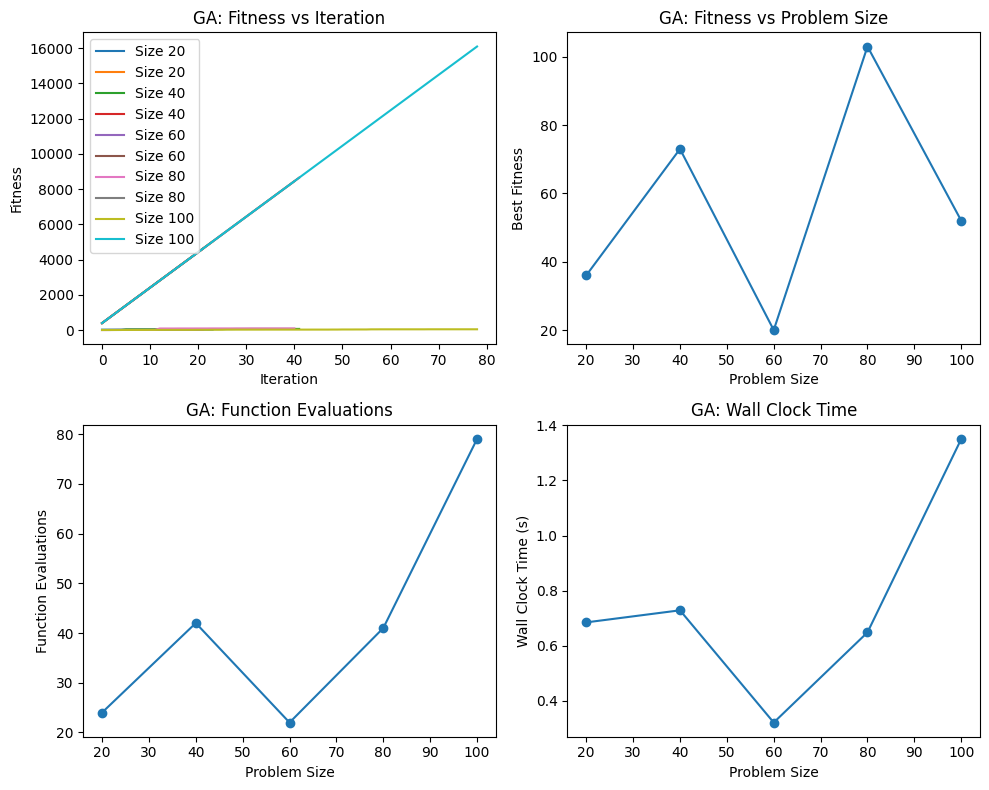

In [7]:
# Function to run GA experiment
def run_ga_experiment(problem_size):
    fitness = mlrose.FourPeaks(t_pct=0.15)
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, curve=True)
    end_time = time.time()
    
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
ga_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results for GA
plt.figure(figsize=(10, 8))

# Fitness vs Iteration
plt.subplot(2, 2, 1)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(2, 2, 2)
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('GA: Fitness vs Problem Size')

# Function Evaluations
plt.subplot(2, 2, 3)
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('GA: Function Evaluations')

# Wall Clock Time
plt.subplot(2, 2, 4)
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('GA: Wall Clock Time')

plt.tight_layout()
plt.show()


#### Basic experiment without generator or runners, a naive run to see how RHC, SA, GA performs on 4peaks

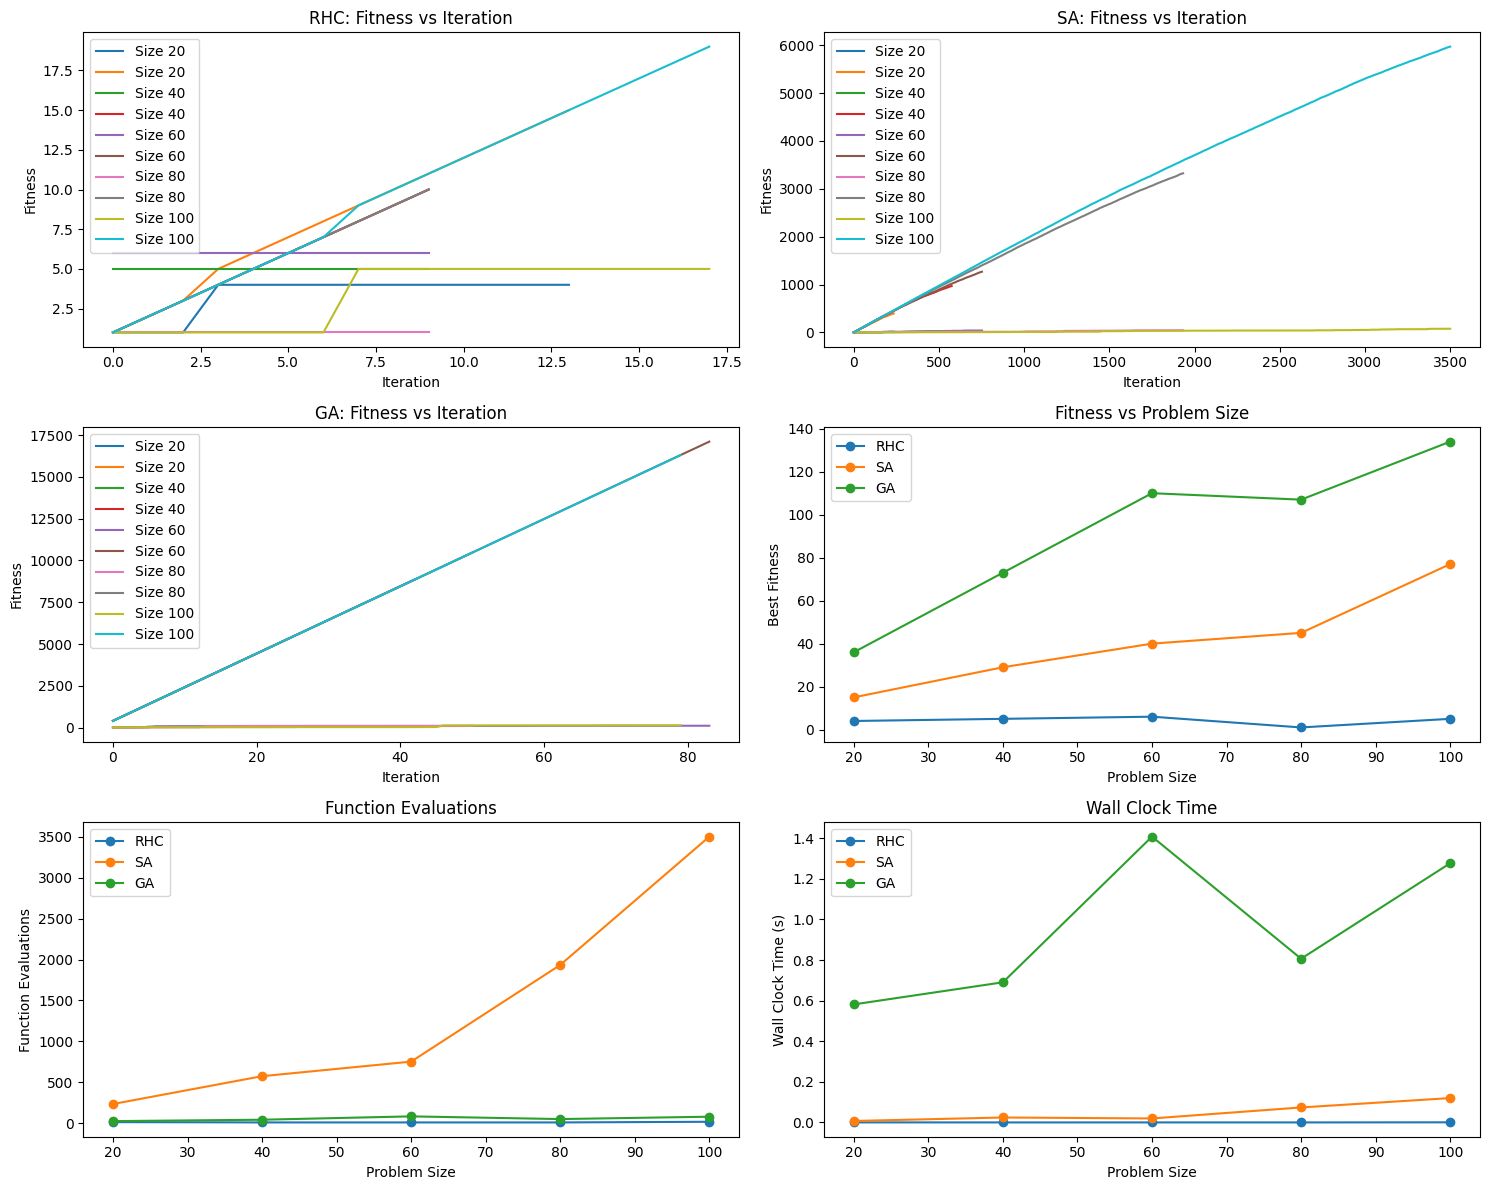

In [8]:
# Define the fitness function globally
fitness = mlrose.FourPeaks(t_pct=0.15)

# Function to run RHC experiment
def run_rhc_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run SA experiment
def run_sa_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    schedule = mlrose.ExpDecay()
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run GA experiment
def run_ga_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [20, 40, 60, 80, 100]
rhc_results = []
sa_results = []
ga_results = []

for size in problem_sizes:
    best_fitness, fitness_curve, function_evaluations, run_time = run_rhc_experiment(size)
    rhc_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(15, 12))

# Fitness vs Iteration
plt.subplot(3, 2, 1)
for result in rhc_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('RHC: Fitness vs Iteration')
plt.legend()

plt.subplot(3, 2, 2)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

plt.subplot(3, 2, 3)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(3, 2, 4)
plt.plot(problem_sizes, [result['best_fitness'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()

# Function Evaluations
plt.subplot(3, 2, 5)
plt.plot(problem_sizes, [result['function_evaluations'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')
plt.legend()

# Wall Clock Time
plt.subplot(3, 2, 6)
plt.plot(problem_sizes, [result['run_time'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')
plt.legend()

plt.tight_layout()
plt.show()


Running experiments: 100%|███████████████████████| 5/5 [15:50<00:00, 190.07s/it]


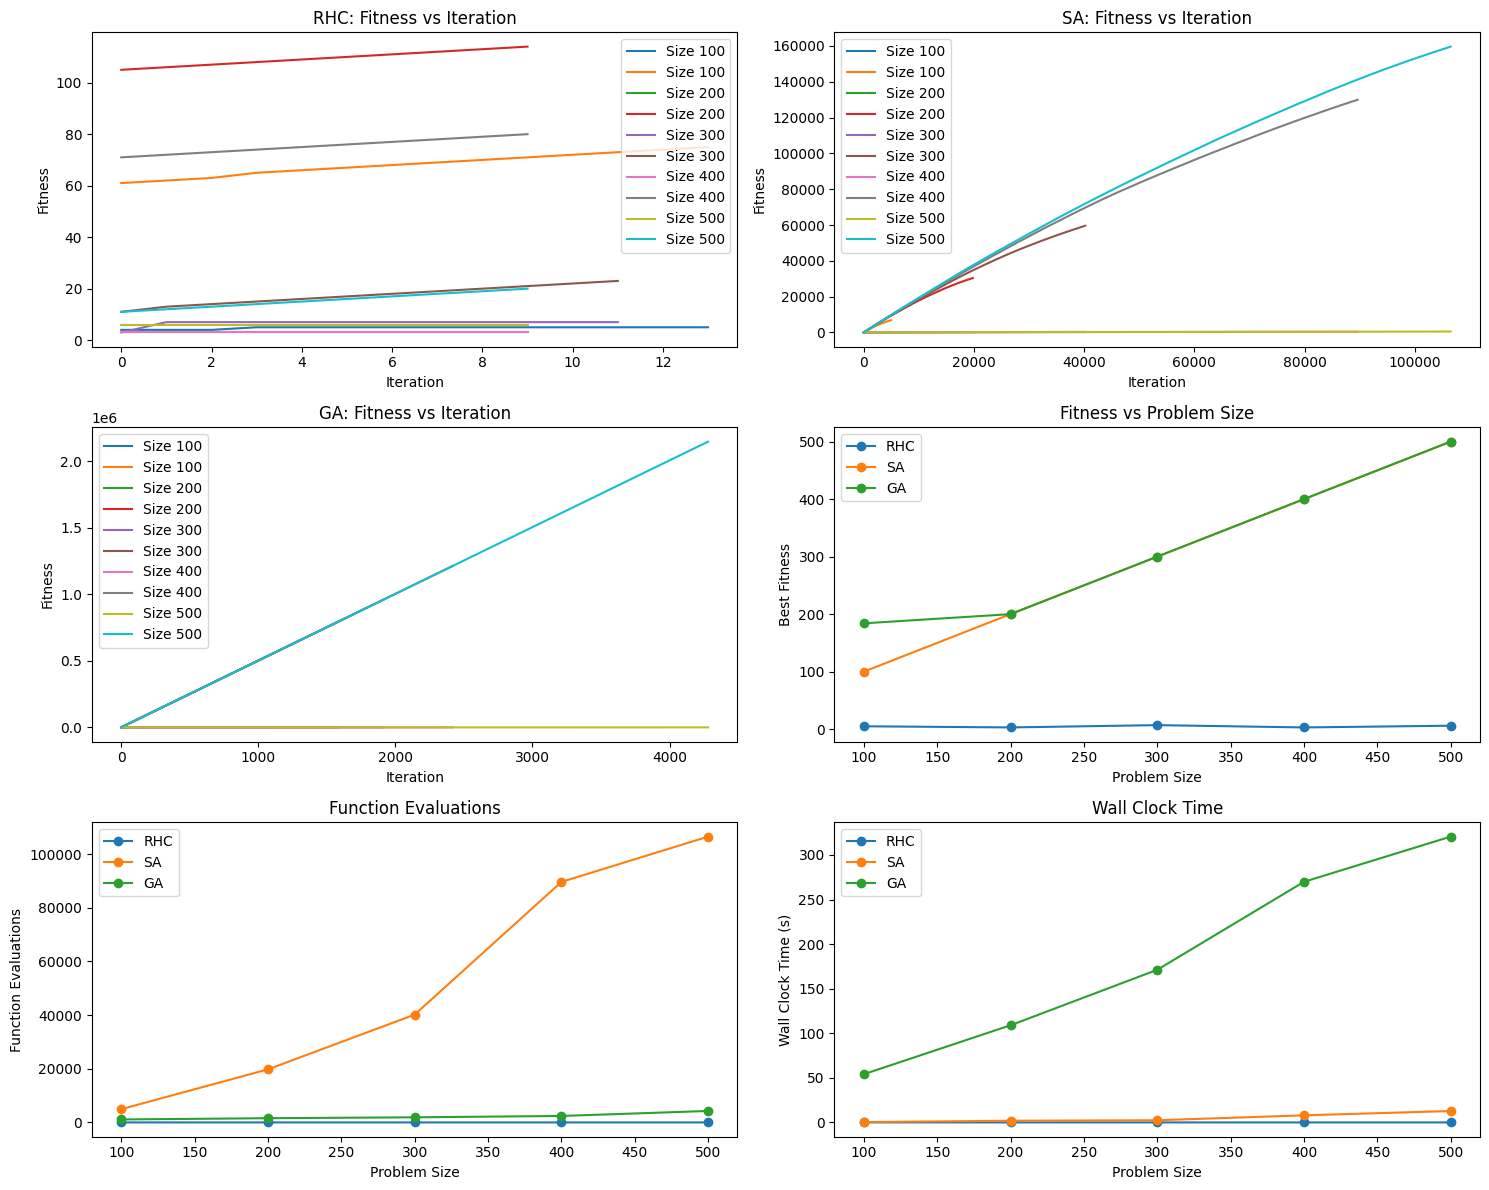

In [11]:
# Define the fitness function globally
fitness = mlrose.FourPeaks(t_pct=0.15)

# Function to run RHC experiment
def run_rhc_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts=10, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run SA experiment
def run_sa_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    schedule = mlrose.ExpDecay()
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, schedule=schedule, max_attempts=1000, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Function to run GA experiment
def run_ga_experiment(problem_size):
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=fitness, maximize=True, max_val=2)
    start_time = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=500, mutation_prob=0.2, max_attempts=1000, curve=True)
    end_time = time.time()
    run_time = end_time - start_time
    function_evaluations = len(fitness_curve)
    return best_fitness, fitness_curve, function_evaluations, run_time

# Run experiments for different problem sizes
problem_sizes = [100, 200, 300, 400, 500]
rhc_results = []
sa_results = []
ga_results = []

for size in tqdm(problem_sizes, desc="Running experiments"):
    best_fitness, fitness_curve, function_evaluations, run_time = run_rhc_experiment(size)
    rhc_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_sa_experiment(size)
    sa_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })
    best_fitness, fitness_curve, function_evaluations, run_time = run_ga_experiment(size)
    ga_results.append({
        'problem_size': size,
        'best_fitness': best_fitness,
        'fitness_curve': fitness_curve,
        'function_evaluations': function_evaluations,
        'run_time': run_time
    })

# Plot results
plt.figure(figsize=(15, 12))

# Fitness vs Iteration for RHC
plt.subplot(3, 2, 1)
for result in rhc_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('RHC: Fitness vs Iteration')
plt.legend()

# Fitness vs Iteration for SA
plt.subplot(3, 2, 2)
for result in sa_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('SA: Fitness vs Iteration')
plt.legend()

# Fitness vs Iteration for GA
plt.subplot(3, 2, 3)
for result in ga_results:
    plt.plot(result['fitness_curve'], label=f'Size {result["problem_size"]}')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('GA: Fitness vs Iteration')
plt.legend()

# Fitness vs Problem Size
plt.subplot(3, 2, 4)
plt.plot(problem_sizes, [result['best_fitness'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['best_fitness'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['best_fitness'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs Problem Size')
plt.legend()

# Function Evaluations
plt.subplot(3, 2, 5)
plt.plot(problem_sizes, [result['function_evaluations'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['function_evaluations'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['function_evaluations'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Function Evaluations')
plt.title('Function Evaluations')
plt.legend()

# Wall Clock Time
plt.subplot(3, 2, 6)
plt.plot(problem_sizes, [result['run_time'] for result in rhc_results], marker='o', label='RHC')
plt.plot(problem_sizes, [result['run_time'] for result in sa_results], marker='o', label='SA')
plt.plot(problem_sizes, [result['run_time'] for result in ga_results], marker='o', label='GA')
plt.xlabel('Problem Size')
plt.ylabel('Wall Clock Time (s)')
plt.title('Wall Clock Time')
plt.legend()

plt.tight_layout()
plt.show()


These graphs tell me that: 
- RHC struggles to find high fitness values, even as the problem size increases. The fitness improves slowly. 
- SA finds higher fitness values compared to RHC, but it takes longer and improves its fitness steadily over iterations.
- GA finds the highest fitness quickly and efficiently, which means it's efficient in finding the optimal solution for larger problem sizes. 

In terms of **problem size**: 
- GA consistently outperforms RHC and SA, especially for larger problem size. SA performs better than RHC for larger problem size. 

In terms of **FEvals**: 
- GA takes the longest, especially as problem size increases. RHC is the fastest.

SA seems to be the best balanced in terms of performance but requires more evaluation. Compared to RHC, it's more effective, but faster. Compared to GA, it's faster, but isn't as optimal. 

#### first, define 4peaks with the generator class

The below code is taken directly from the mlrose-hiive library. The four-peaks generator class wasn't installed so pasting it here directly is my workaround.

In [29]:
""" Classes for defining optimization problem objects."""

import numpy as np

from mlrose_hiive import DiscreteOpt, FourPeaks


class FourPeaksGenerator:
    """Generator class for Four Peaks."""
    @staticmethod
    def generate(seed, size=20, t_pct=0.1):
        np.random.seed(seed)
        fitness = FourPeaks(t_pct=t_pct)
        problem = DiscreteOpt(length=size, fitness_fn=fitness)
        return problem

In [30]:
problem_size = 100
problem = FourPeaksGenerator.generate(seed=428, size=problem_size)

In [13]:
pip install git+https://github.com/hiive/mlrose.git

  Cloning https://github.com/hiive/mlrose.git to /private/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/pip-req-build-ey4bd8nl
  Running command git clone --filter=blob:none --quiet https://github.com/hiive/mlrose.git /private/var/folders/xk/k8dyvhjj43d3vm_p1k410c080000gn/T/pip-req-build-ey4bd8nl
  Resolved https://github.com/hiive/mlrose.git to commit 9c5d6ba18f5a81e20e31432b1dc02a0b3ff8d27f
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


#### use RHCRunner to perform gridsearch to test different configs, get intuition for which parameters to tune further

In [ ]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt


# Define the RHC Runner
rhc_runner = mlrose.RHCRunner(problem=problem,
                              experiment_name="RHC_Experiment",
                              output_directory=None,  # Set an output directory if needed
                              seed=42,
                              iteration_list=2**np.arange(10),
                              max_attempts=500,
                              restart_list=[0, 10, 20, 30])

# Run the experiment
rhc_run_stats, rhc_run_curves = rhc_runner.run()

# Print the best state and fitness
print("Best state found:", rhc_run_stats['BestState'][0])
print("Best fitness found:", rhc_run_stats['Fitness'][0])

# Plot fitness curve
plt.figure()
for curve in rhc_run_curves:
    plt.plot(curve['Fitness'])
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('RHC: Fitness vs Iteration')
plt.show()
